In [4]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

sns.set(style="white", context="talk", font_scale=1.2, palette=sns.color_palette("bright"), color_codes=False)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['figure.figsize'] = (8, 6)

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['DejaVu Sans']
matplotlib.rcParams['mathtext.fontset'] = 'cm'

In [17]:
shared_path_p1 = './results/'
seeds = [0, 1, 2]
shared_path_p2 = '-cifar10-002-'
shared_path_p3 = '-resnet18-200_traces.npz'
all_data_paths = ['SOX-0.0001-0.1-0.9-32-64', 'MOAPV2-0.0001-0.5-0.9-32', 'SOAP-0.0001-0.5-32', 'SOAP-0.0001-1.0-32']

In [ ]:
plt.figure(0).clf()
markers = ['D', 'o', 'v', '*', 'x', '']
colors = ['r', 'y', 'm', 'b', 'g', 'c']
for i, data_path in enumerate(all_data_paths):
    epochs = []
    tr_AP = []
    time_pb = []
    if 'SOAP' in data_path and '1.0' in data_path:
        alg_name = 'BSGD'
    elif 'SOAP' in data_path:
        alg_name = 'SOAP'
    elif 'MOAPV2' in data_path:
        alg_name = 'MOAP'
    elif 'SOX' in data_path:
        alg_name = 'SOX'
    else:
        raise ValueError
    for seed in seeds:
        full_data_path = shared_path_p1 + str(seed) + shared_path_p2 + data_path + shared_path_p3
        meta_data = np.load(full_data_path)
        epochs.append(meta_data['epochs_trace'])
        tr_AP.append(meta_data['tr_AP_trace'])
        time_pb.append(meta_data['time_pb_trace'])
    plt.plot(np.mean(np.array(epochs), axis=0), np.mean(np.array(tr_AP), axis=0), markevery=20, marker=markers[i], color=colors[i], label=alg_name)
    plt.fill_between(np.mean(np.array(epochs), axis=0), np.mean(np.array(tr_AP), axis=0) - np.std(np.array(tr_AP), axis=0), np.mean(np.array(tr_AP), axis=0) + np.std(np.array(tr_AP), axis=0), alpha=0.1, color=colors[i])
plt.legend(fontsize=18)
plt.tight_layout()
plt.xlabel('Epochs')
plt.ylim(bottom=0.947, top=0.999)
plt.xlim(left=0, right=200)
plt.title('CIFAR-10')
plt.ylabel('AP')
plt.savefig('./figs/cifar10_SOX_BSGD_SOAP_MOAP_ap.pdf', dpi=300, bbox_inches='tight')

SOX-0.0001-0.1-0.9-32-64: time/epoch: 0.05996408042331661 +- 0.003637795483063346
MOAPV2-0.0001-0.5-0.9-32: time/epoch: 0.05399647642593458 +- 0.003109266902750387
SOAP-0.0001-0.5-32: time/epoch: 0.0544256987315913 +- 0.0022246519969296974
SOAP-0.0001-1.0-32: time/epoch: 0.05844765981798992 +- 0.0005539994427252301


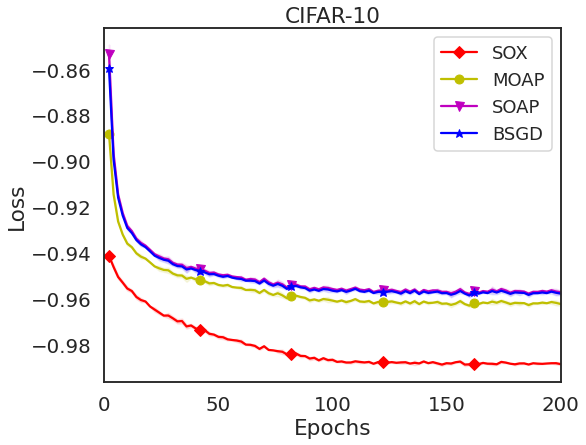

In [21]:
plt.figure(1).clf()
markers = ['D', 'o', 'v', '*', 'x', '']
colors = ['r', 'y', 'm', 'b', 'g', 'c']
for i, data_path in enumerate(all_data_paths):
    epochs = []
    tr_loss = []
    time_pb = []
    if 'SOAP' in data_path and '1.0' in data_path:
        alg_name = 'BSGD'
    elif 'SOAP' in data_path:
        alg_name = 'SOAP'
    elif 'MOAPV2' in data_path:
        alg_name = 'MOAP'
    elif 'SOX' in data_path:
        alg_name = 'SOX'
    else:
        raise ValueError
    for seed in seeds:
        full_data_path = shared_path_p1 + str(seed) + shared_path_p2 + data_path + shared_path_p3
        meta_data = np.load(full_data_path)
        epochs.append(meta_data['epochs_trace'])
        tr_loss.append(meta_data['tr_loss_trace'])
        time_pb.append(meta_data['time_pb_trace'])
    plt.plot(np.mean(np.array(epochs), axis=0), np.mean(np.array(tr_loss), axis=0), markevery=20, marker=markers[i], color=colors[i], label=alg_name)
    plt.fill_between(np.mean(np.array(epochs), axis=0), np.mean(np.array(tr_loss), axis=0) - np.std(np.array(tr_loss), axis=0), np.mean(np.array(tr_loss), axis=0) + np.std(np.array(tr_loss), axis=0), alpha=0.1, color=colors[i])
plt.legend(fontsize=18)
plt.tight_layout()
plt.xlabel('Epochs')
plt.xlim(left=0, right=200)
plt.title('CIFAR-10')
plt.ylabel('Loss')
plt.savefig('./figs/cifar10_SOX_BSGD_SOAP_MOAP_loss.pdf', dpi=300, bbox_inches='tight')
